<a href="https://colab.research.google.com/github/Shibu4064/Thesis_Final/blob/main/banfakeBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
auth=pd.read_csv("/content/drive/MyDrive/Authentic-48K.csv")
fake=pd.read_csv("/content/drive/MyDrive/Fake-1K.csv")

In [ ]:
auth.head()
auth.shape
auth

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
48673,61776,banglanews24.com,2018-10-11 16:39:23,Sports,"এনসিএলে তিতলির প্রভাব, সব ম্যাচ ড্র",প্রথমে বাংলাদেশের কাছ দিয়ে যাওয়ার কথা থাকলেও ঘ...,1
48674,61777,banglanews24.com,2018-10-11 16:39:27,International,"কর্ম-বসবাসে সেরা সিঙ্গাপুর, আয়ে সুইজারল্যান্ড",উন্নত জীবনযাপনের জন্য অনেকেই বিদেশে পাড়ি দেন। ...,1
48675,61778,banglanews24.com,2018-10-11 16:39:30,Politics,জয়পুরহাটে জামায়াতের ১৯ নেতাকর্মী আটক,জয়পুরহাট: সরকার বিরোধী গোপন বৈঠকের সময় জয়পুরহা...,1
48676,61779,banglanews24.com,2018-10-11 16:39:32,National,ভ্যানগার্ড পোশাক কারখানাকে জরিমানা,চট্টগ্রাম: পরিবেশ দূষণের দায়ে নগরের আগ্রাবাদ এ...,1


In [ ]:
fake.head()
fake.shape
fake

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


In [ ]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

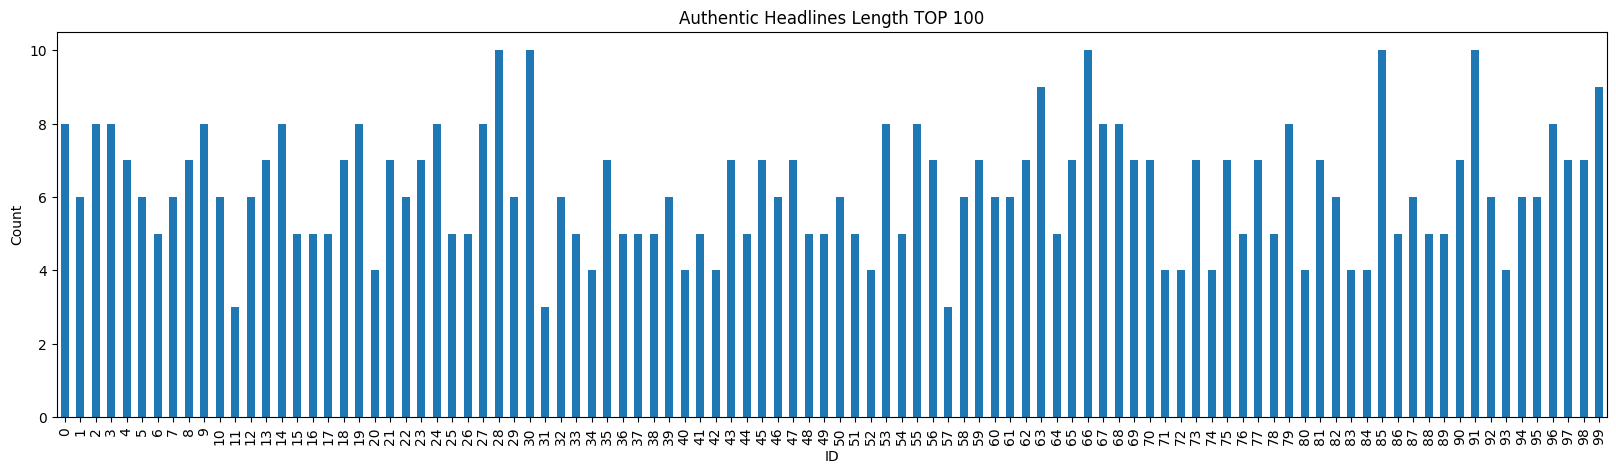

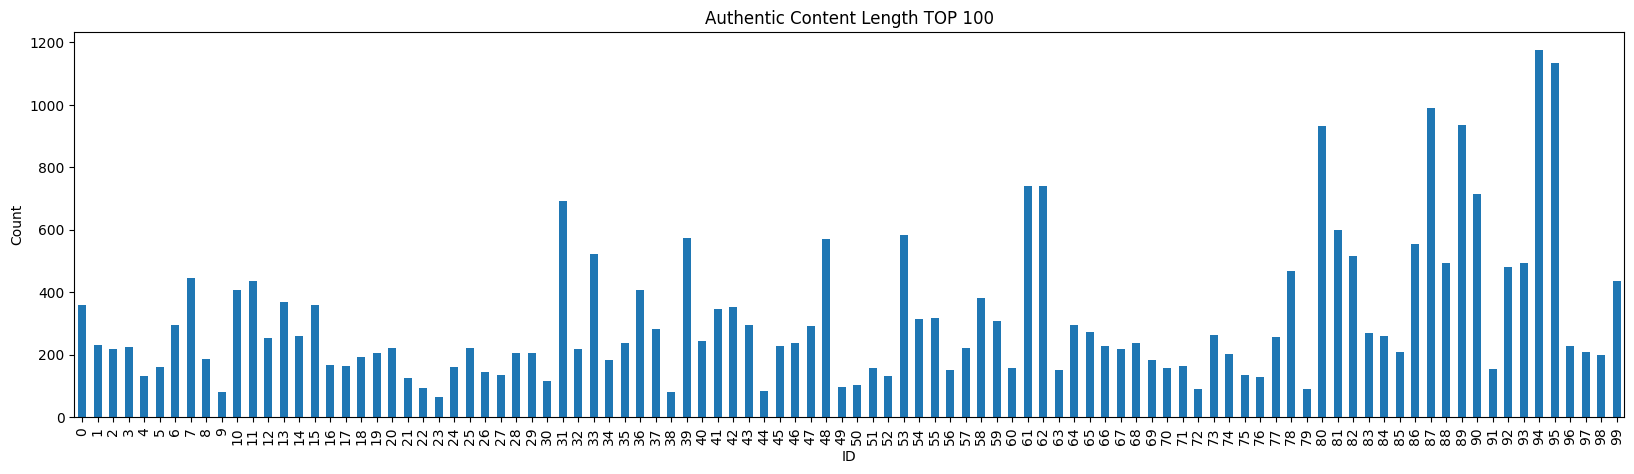

In [ ]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

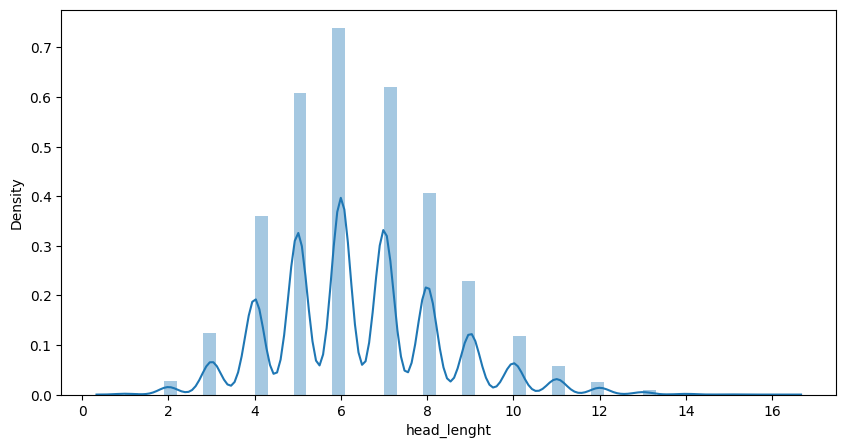

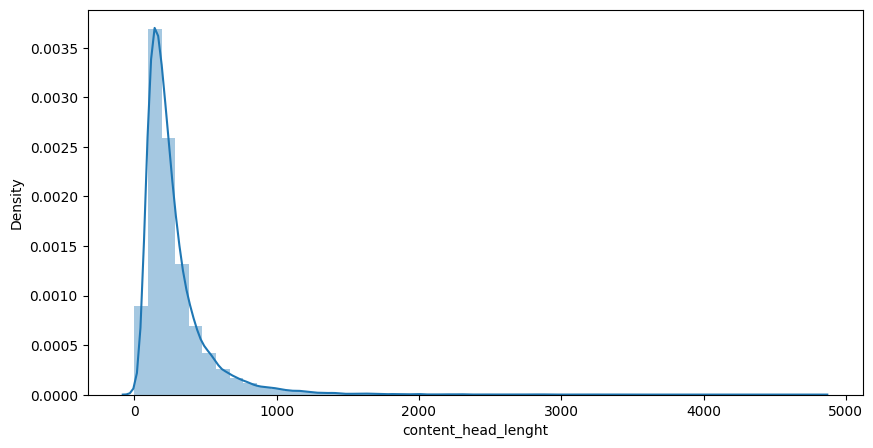

In [ ]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

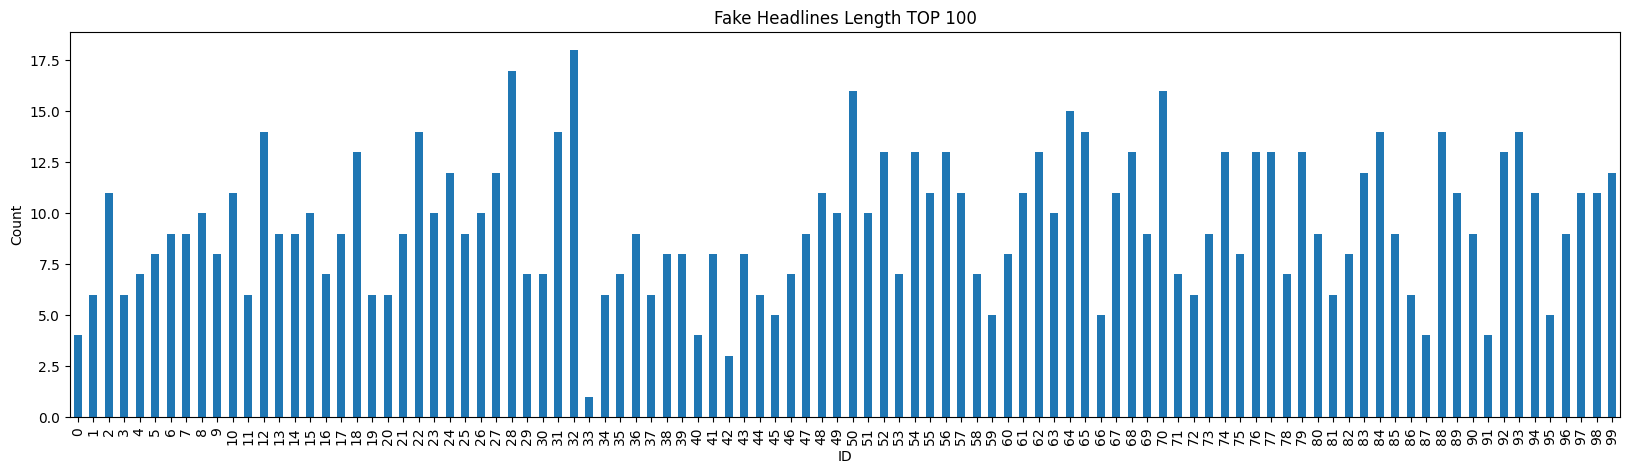

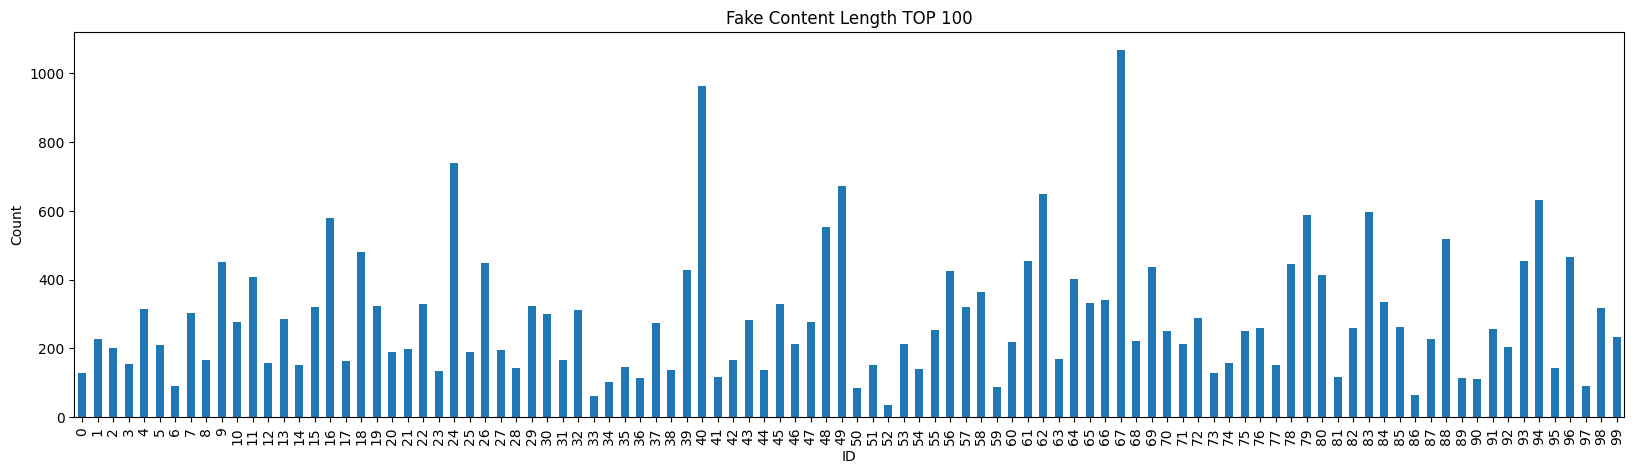

In [ ]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

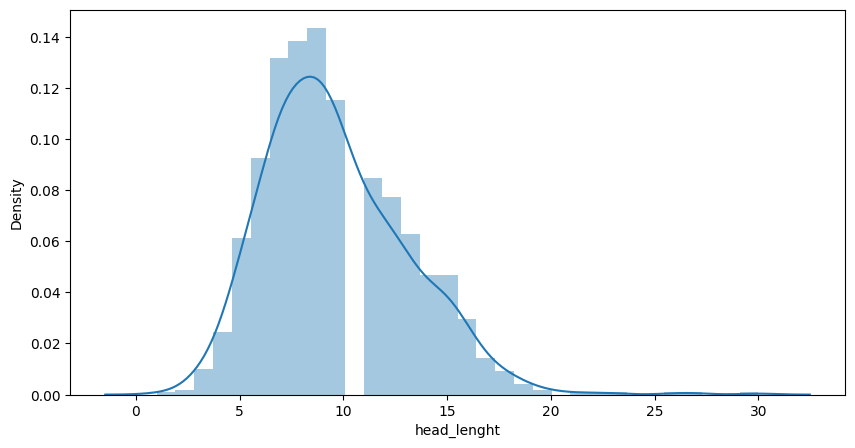

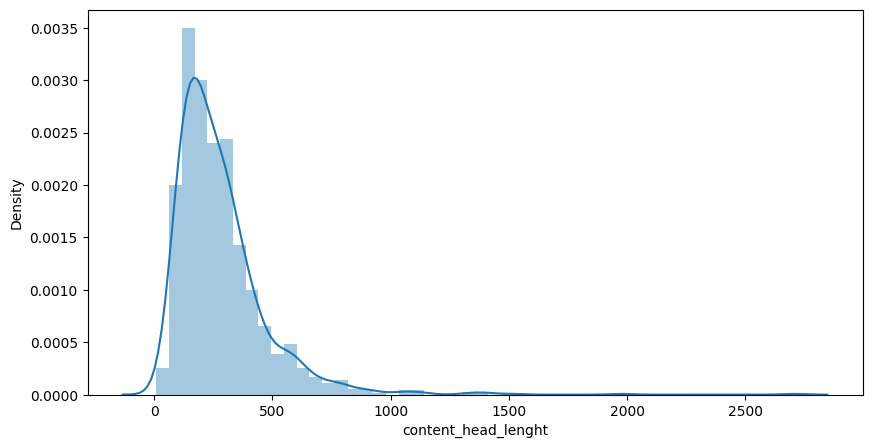

In [ ]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

In [ ]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2023-08-16 07:37:36--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 104.21.11.66, 172.67.165.83, 2606:4700:3037::6815:b42, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|104.21.11.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip.1’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.03s   

2023-08-16 07:37:36 (8.85 MB/s) - ‘06-nikosh-bangla-font.zip.1’ saved [317905/317905]



In [ ]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
replace Nikosh.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Nikosh.ttf              


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    font_path="/content/Nikosh.ttf",
                    min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

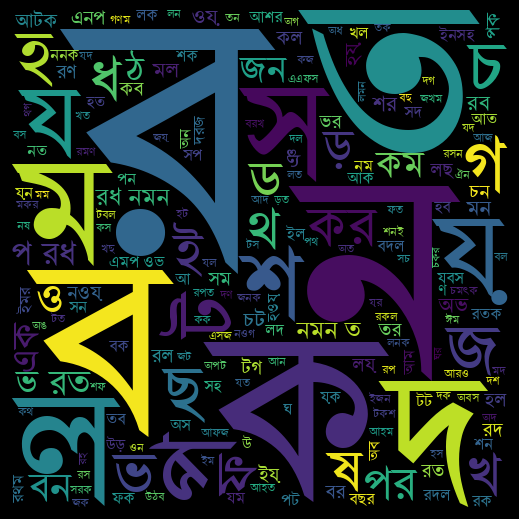

In [ ]:
s= " ".join(auth.headline[:100])
plot_world(s)

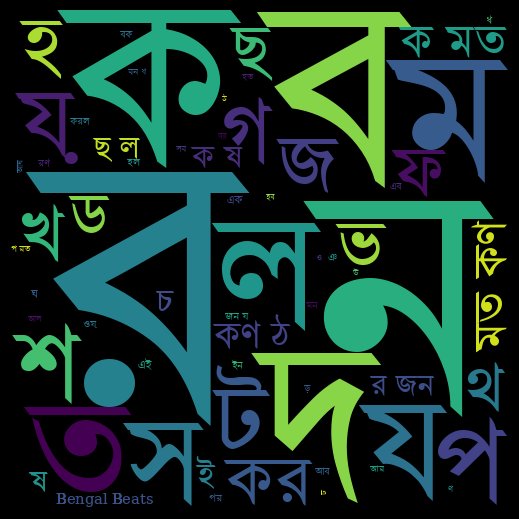

In [ ]:
s= " ".join(fake.headline[:100])
plot_world(s)

In [ ]:
!pip install bnlp_toolkit

In [ ]:
pip show bnlp_toolkit

Name: bnlp-toolkit
Version: 4.0.0
Summary: BNLP is a natural language processing toolkit for Bengali Language
Home-page: https://github.com/sagorbrur/bnlp
Author: Sagor Sarker
Author-email: sagorhem3532@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: emoji, ftfy, gensim, nltk, numpy, requests, scipy, sentencepiece, sklearn-crfsuite, tqdm
Required-by: 


In [ ]:
!pip show bnlp

In [ ]:
from bnlp import corpus

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [ ]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [ ]:
auth_corpus = create_corpus(auth.headline[:1000])
print("Total auth tokens in 1000", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:1000])
print("Total auth tokens in 1000", len(fake_corpus))

Total auth tokens in 1000 7441
Total auth tokens in 1000 10458


In [ ]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("/content/Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
!pip install bnlp

  Preparing metadata (setup.py) ... done
  Created wheel for bnlp: filename=bnlp-0.8-py3-none-any.whl size=32803 sha256=e5ee0519fa4c67596e614b6202d5eaa50d8abcbccb6a99385a41056b201b03fc
  Stored in directory: /root/.cache/pip/wheels/64/c7/7e/272284eb8c800fbb5306bdf7904ae9f99a64812fc615f471b2
Successfully built bnlp


In [ ]:
!pip install stop-words
!npm install stopwords-bn

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ stopwords-bn@0.1.0
added 1 package from 1 contributor and audited 1 package in 0.99s
found 0 vulnerabilities



In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words_bengali = stopwords.words('bengali')

print(stop_words_bengali)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from collections import defaultdict
from collections import  Counter
# from bnlp.corpus import stopwords
from nltk.corpus import stopwords
stop_words_bengali = stopwords.words('bengali')
import matplotlib.font_manager as fm


def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stop_words_bengali:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

In [ ]:
!pip show bnlp

Name: bnlp
Version: 0.8
Summary: Better Natural Language Processing, a collection of open source nlp methods used by Better Know The Opposition
Home-page: https://github.com/BKTO/bnlp
Author: Better Know The Opposition
Author-email: hello@betterknowtheopposition.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


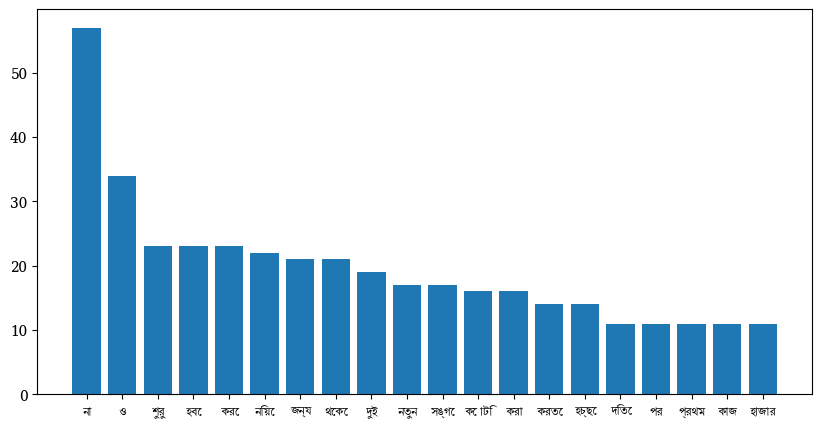

In [ ]:
show_stop_words(auth_corpus)

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 52, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


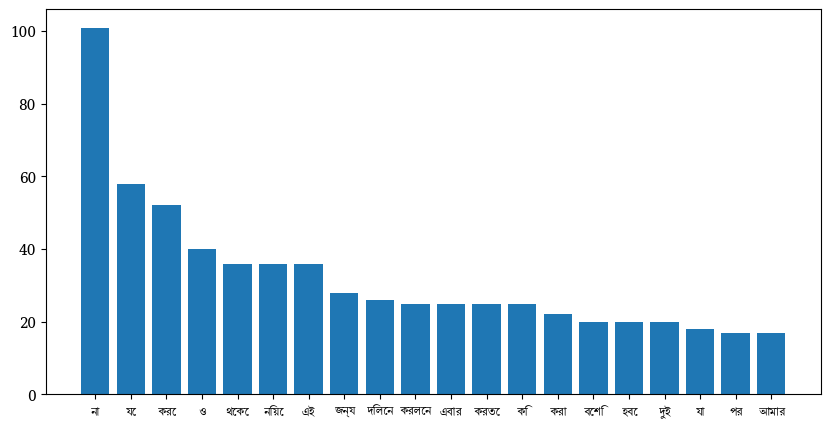

In [ ]:
show_stop_words(fake_corpus)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt')

def filters(corpus):
    stop_words = set(stopwords.words('english'))
    res = []
    for i in corpus:
        if i in stop_words:
            continue

        if i in punctuation + '‘' + '’':
            continue

        if i.isdigit():
            continue

        res.append(i)

    return res


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [ ]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [ ]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 100 words")
print(x[:100])
print(y[:100])

Top 100 words
('না', 'সেপ্টেম্বর', 'প্রধানমন্ত্রী', 'ও', 'পাকিস্তান', 'লাখ', 'শুরু', 'হবে', 'করে', 'ভারত', 'নিয়ে', 'জন্য', 'থেকে', 'আটক', 'বাংলাদেশ', 'উদ্ধার', 'ভারতের', 'দুই', 'সোহেল', 'মৃত্যু', 'বিএনপি', 'টাকা', 'বাংলাদেশের', 'নতুন', 'সঙ্গে', 'নওয়াজ', 'এক', 'কোটি', 'করা', 'খালেদা', 'আফজাল', 'নেতা', 'লাশ', 'প্রধানমন্ত্রীর', 'অভিযোগ', 'মুক্তির', 'নিহত', 'করতে', 'হচ্ছে', 'সরকার', 'বিপক্ষে', 'বিরুদ্ধে', 'মেসির', 'রিমান্ডে', 'দিতে', 'দিনের', 'দিয়ে', 'পর', 'স্থগিত', 'রায়', 'অক্টোবর', 'প্রথম', 'কাজ', 'বছর', 'হাজার', 'আজ', 'মুক্তি', 'টাকার', 'অনুদান', 'সচিব', 'কোটা', 'ব্যাটিংয়ে', 'জামিন', 'কেন', 'হত্যা', 'জিয়ার', 'রোহিঙ্গা', 'শিশু', 'এশিয়া', 'গিয়ে', 'দাবি', 'নির্দেশ', 'নিলেন', 'শরীফকে', 'জিতে', 'জয়', 'হ্যাটট্রিকে', 'হত্যার', 'র', 'যুবকের', 'সাবেক', 'তিন', 'বিমান', 'মৃত্যুদণ্ড', 'নেতার', 'চার', 'ম্যাচ', 'অসুস্থ', 'টস', 'হলেন', 'দিল', 'মাদক', 'সাংবাদিক', 'মামলায়', 'স্ত্রী', 'নেই', 'অপরাধ', 'থাকবে', 'পাকিস্তানের', 'স্বামীর')
(57, 52, 45, 34, 33, 25, 23, 23, 23, 23, 22, 21, 21, 21, 20, 20, 19, 1

In [ ]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 100 words")
print(x[:100])
print(y[:100])

Top 100 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'না', 'যে', 'করে', 'এক', 'ও', 'থেকে', 'নিয়ে', 'এই', 'হয়ে', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'সাথে', 'করা', 'দিয়ে', 'বেশি', 'কারণে', 'হবে', 'দুই', 'শেখ', '১০টি', '।', 'যেভাবে', 'যা', 'পর', 'আমার', 'টাকা', 'বিয়ে', 'করার', 'যেমন', 'ফেসবুক', 'দেখে', 'পারে', 'হাসিনা', 'হিসেবে', 'করবেন', 'ভিডিও', 'হলে', 'ঢাকা', 'আসছে', 'সেরা', 'বাংলাদেশ', 'যদি', 'বিশ্বের', 'হিরো', 'করলো', 'কথা', 'সময়', 'হলো', 'দিন', 'র', 'যাচ্ছে', 'ছবি', 'চান', 'পারেন', 'হচ্ছে', 'প্রধানমন্ত্রী', 'এখন', 'আলম', 'আমি', 'ছেলেরা', 'জেনে', 'বরিশালের', 'সময়', 'গান', 'এর', 'বাংলাদেশি', 'করছে', 'বন্ধ', 'নোয়াখালীর', 'খেয়ে', 'ধরা', 'করলে', 'জন', 'বদলে', 'যেসব', 'গেলো', 'আর', 'এ', 'মাহফুজুর', 'বাজারে', 'করছেন', 'এলো', 'দেখা', 'দিতে', 'ছেলে', 'বাবা', 'কাজ', 'বললেন', 'আবুল', 'মধ্যে', 'গেলেন', 'আটক')
(151, 151, 139, 139, 101, 58, 52, 41, 40, 36, 36, 36, 29, 28, 26, 25, 25, 25, 25, 24, 22, 21, 20, 20, 20, 20, 19, 19, 18, 18, 18, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00


In [ ]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification



In [ ]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data

        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [ ]:
auth = pd.read_csv("/content/Authentic-48K.csv")
fake = pd.read_csv("/content/Fake-1K.csv")

df = auth[:fake.shape[0]* 7]
df = df.append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df)

10392

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered = []
    for i in tokens:
        if i in stop_words:
            continue

        if i in punctuation + '‘' + '’':
            continue

        filtered.append(i)

    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))


********** Before ***************
বিয়ের দাওয়াত মানেই উৎসবের আমেজ, সাজ সাজ রব, গল্প-আড্ডা, ভরপুর খাওয়া-দাওয়া, কিছু ঘটনা। জীবনে বিয়ের দাওয়াত খাননি এমন মানুষ খুঁজে পাওয়া যাবে না। ঘটনাবহুল এমনই একটি বিয়েতে বাজিমাত করেছেন মোশাররফ করিম, মিথিলা ও মনোজ কুমার। তাদের সঙ্গে ছিলেন  মুকিত জাকারিয়া, শামীম জামান,  সুমন পাটোয়ারীসহ আরও অনেকে।    বাংলালিংক নিবেদিত বাংলাফ্লিক্স এক্সক্লুসিভ ‘বিয়ের দাওয়াত রইলো’ নামের টেলিফিল্মটিতে মজার মজার সব ঘটনার জন্ম দিয়েছেন মোশাররফ করিমসহ অন্য শিল্পীরা।  এটি এক্সক্লুসিভলি দেখা যাচ্ছে দেশের অন্যতম স্ট্রিমিং প্ল্যাটফর্ম বাংলাফ্লিক্সে।   অন্যদিকে ১৬ সেপ্টেম্বর টেলিছবিটি বাংলাঢোলের ইউটিউব চ্যানেলে আপলোড করার পর থেকে প্রতিদিন গড়ে এক লাখ দর্শক দেখছেন এটি।  এখন পর্যন্ত ‘বিয়ের দাওয়াত রইলো’ দেখা হয়েছে প্রায় সাড়ে চার লাখ বার!   হাস্যরসাত্মক টেলিছবিটি তৈরি করেছেন রেদওয়ান রনি। এতে আছে হৃদয় খান ও আনিকার গাওয়া ‘লুকোচুরি প্রেম’ শিরোনামের একটি রোমান্টিক গান। এ ছাড়া রয়েছে তৃষা চ্যাটার্জীর কণ্ঠে বিয়ের গান ‘দাওয়াত’। এতে শিল্পীদের সঙ্গে বিশেষ উপস্থিতি রয়েছে অর্চিতা স্পর্শিয়ার।   টেলিফিল্

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])

In [ ]:
len(train_df), len(test_df)

(8313, 2079)

In [ ]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [ ]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

In [ ]:
first_dropout_rate=0.2
hidden_output=768
classes=2
class BERTBengaliTwo(nn.Module):
    def __init__(self, bert):
        super(BERTBengaliTwo, self).__init__()
        self.bert = bert
        self.drop_out = nn.Dropout(first_dropout_rate)
        self.l0 =  nn.Linear(hidden_output * 2, classes)
        #torch.nn.init.normal_(self.l0.weight, std=0.02)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        out = torch.cat((outputs.hidden_states[-1], outputs.hidden_states[-2]), dim=-1)
        out = self.drop_out(out)
        out = out[:,0,:]
        logits = self.l0(out)
        return logits

sagorsarker/bangla-bert-base

In [ ]:
from transformers import BertForMaskedLM, AutoTokenizer

In [ ]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertForMaskedLM.from_pretrained(bert_model_name, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTBengaliTwo(bert)
model.to(device);

In [ ]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[-0.9878, -0.5125]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

In [ ]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [ ]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [ ]:
epochs = 10
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [ ]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]

    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)

    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.283885.. 	Valid Loss:0.382680.. 	Accuracy: 92.9293
Epoch: 2/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.187527.. 	Valid Loss:0.288353.. 	Accuracy: 90.6686
Epoch: 3/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.129155.. 	Valid Loss:0.318662.. 	Accuracy: 94.3242
Epoch: 4/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.082737.. 	Valid Loss:0.277905.. 	Accuracy: 94.1318
Epoch: 5/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.049152.. 	Valid Loss:0.308470.. 	Accuracy: 94.2761
Epoch: 6/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.049083.. 	Valid Loss:0.300419.. 	Accuracy: 94.3723
Epoch: 7/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.048062.. 	Valid Loss:0.301839.. 	Accuracy: 94.4204
Epoch: 8/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.044842.. 	Valid Loss:0.302794.. 	Accuracy: 94.4204
Epoch: 9/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.046478.. 	Valid Loss:0.303075.. 	Accuracy: 94.4204
Epoch: 10/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.045490.. 	Valid Loss:0.303294.. 	Accuracy: 94.4204
Training completed in 39m 34s


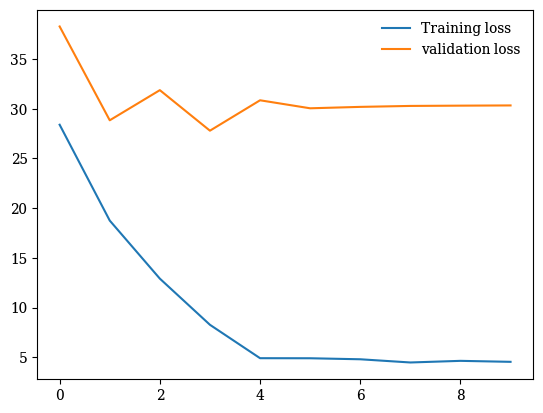

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

In [ ]:
model.load_state_dict(torch.load("./news_model1.pth", map_location = device))

<All keys matched successfully>

In [ ]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.87      0.62      0.73       260
           1       0.95      0.99      0.97      1819

    accuracy                           0.94      2079
   macro avg       0.91      0.80      0.85      2079
weighted avg       0.94      0.94      0.94      2079

